In [1]:
import pickle
import itertools
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', title_fontsize=16)
plt.rc('legend', framealpha=0.0)
plt.rc('figure', titlesize=16)

cs = ['royalblue', 'olivedrab', 'purple', 'darkorange', 'deepskyblue']

In [2]:
### Dependent variables
num_train_examples_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
random_labels_list = [True, False]
binary_digits_list = [True, False]
depth_list = [2, 7]
width_list = [5000, 10000]
seed_list = [0, 1, 2]

param_product = itertools.product( num_train_examples_list, random_labels_list, binary_digits_list, depth_list, width_list, seed_list )

results = {}

for params in param_product:
    fname = 'logs/pac-bayes/' + str(params) + '.pickle'
    results[params] = pickle.load( open( fname, "rb" ) )

In [3]:
def get_curves(results, random_labels, binary_digits, depth, width, idx):
    
    array = np.zeros((3,10))

    for seed in seed_list:
        for num_idx, num_train_examples in enumerate(num_train_examples_list):
            result = results[(num_train_examples, random_labels, binary_digits, depth, width, seed)][idx]
            if idx == 0:
                array[seed,num_idx] = 1-result[-1]
            elif idx == 1:
                array[seed,num_idx] = 1-result
            else:
                array[seed,num_idx] = result
    
    return array.mean(axis=0), array.max(axis=0), array.min(axis=0)

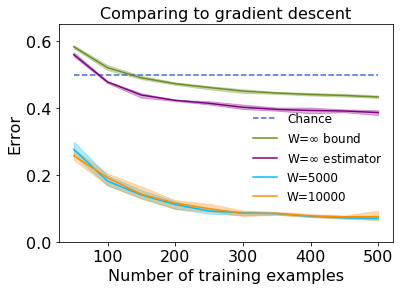

In [4]:
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label="Chance", linestyle='--', color=cs[0])

random_labels = False
binary_digits = False
depth = 7
width = 5000

label = "W=$\infty$ bound"
color = cs[1]
idx = 5
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "W=$\infty$ estimator"
color = cs[2]
idx = 2
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = f"W={width}"
color = cs[4]
idx = 1
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

width = 10000
label = f"W={width}"
color = cs[3]
idx = 1
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.ylim(0.0,0.65)
plt.title("Comparing to gradient descent")
plt.legend(loc='lower right', bbox_to_anchor=(1.0,0.13), fontsize=12)
plt.savefig('figures/bounds.pdf', bbox_inches='tight')
plt.show()

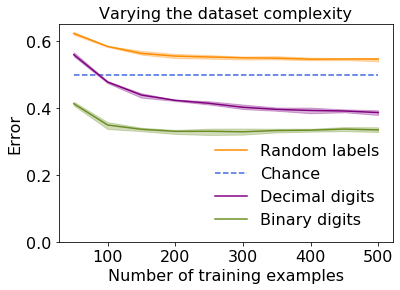

In [5]:
depth = 7
width = 5000

label = "Random labels"
random_labels = True
binary_digits = False
color = cs[3]
idx = 2
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "Chance"
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label=label, linestyle='--', color=cs[0])

label = "Decimal digits"
random_labels = False
binary_digits = False
color = cs[2]
idx = 2
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

label = "Binary digits"
random_labels = False
binary_digits = True
color = cs[1]
idx = 2
mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
plt.plot(num_train_examples_list, mean, label=label, color=color)
plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)


plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.ylim(0.0,0.65)
plt.title("Varying the dataset complexity")
plt.legend(loc='lower right')
plt.savefig('figures/dataset-complexity.pdf', bbox_inches='tight')
plt.show()

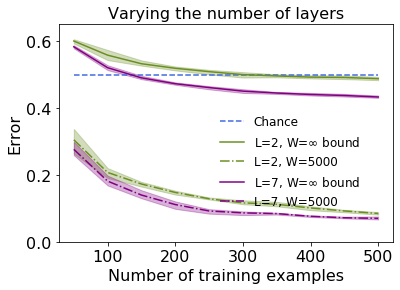

In [6]:
width = 5000
random_labels = False
binary_digits = False

label = "Chance"
plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label=label, linestyle='--', color=cs[0])

for d_idx, depth in enumerate(depth_list):
    label = f"L={depth}, W=$\infty$ bound"
    color = cs[d_idx+1]
    idx = 5
    mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color)
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

    label = f"L={depth}, W={width}"
    color = cs[d_idx+1]
    idx = 1
    mean, maxi, mini = get_curves(results, random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color, linestyle='-.')
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.ylim(0.0,0.65)
plt.title("Varying the number of layers")
plt.legend(bbox_to_anchor=(0.45, 0.63), loc='upper left', fontsize=12)
plt.savefig('figures/varying-depth.pdf', bbox_inches='tight')
plt.show()


NNGP average
mean:  0.33725398369060366
std error:  0.0010746522745838127

Rejection sampled networks
mean:  0.32512195121951215
std error:  0.011425424116559998
mean prediction scale:  0.5158417933597798


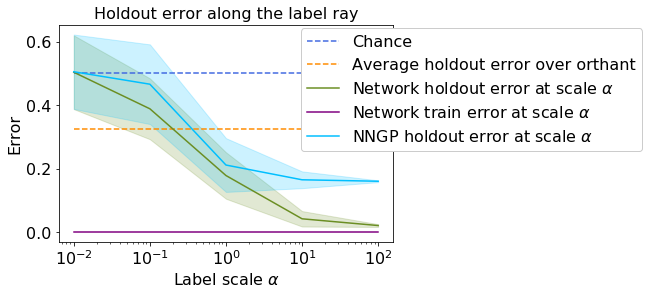

In [7]:
print('\nNNGP average')
fname = 'logs/holdout/nngp-average-acc.pickle'
results = pickle.load( open( fname, "rb" ) )
print('mean: ',1-np.mean(results))
print('std error: ', stats.sem(results))

print('\nRejection sampled networks')
fname = 'logs/holdout/rejection-sampling-networks.pickle'
results = pickle.load( open( fname, "rb" ) )
train_acc_list = results[0]
test_acc_list = results[1]
pred_scale_list = results[2]

test_accs = []
for train_acc, test_acc in zip(train_acc_list, test_acc_list):
    test_acc = train_acc * test_acc + (1-train_acc) * (1-test_acc)
    test_accs.append(test_acc)
random_network_avg = np.mean(test_accs)
print('mean: ', 1-random_network_avg)
print('std error: ', stats.sem(test_accs))
print('mean prediction scale: ', np.mean(pred_scale_list))

fname = 'logs/holdout/varying-target-scales.pickle'
results = pickle.load( open( fname, "rb" ) )

target_scale_list = [0.01,0.1,1.0,10.0,100.0]
train_list = []
mean_list = []
std_list = []
for alpha in target_scale_list:
    train_list.append(1-np.mean(results[alpha][0]))
    mean_list.append(1-np.mean(results[alpha][1]))
    std_list.append(np.std(results[alpha][1]))
        
mini = np.array(mean_list)-np.array(std_list)
maxi = np.array(mean_list)+np.array(std_list)

plt.plot(target_scale_list, [0.5]*len(mean_list), label='Chance', linestyle='--', color=cs[0])
# plt.axvline(x=0.5, linestyle='--', label='Average output scale over orthant', color=cs[0])
plt.plot(target_scale_list, [1-random_network_avg]*len(mean_list), label='Average holdout error over orthant', linestyle='--', color=cs[3])
plt.plot(target_scale_list, mean_list, label=r'Network holdout error at scale $\alpha$', color=cs[1])
plt.fill_between(x=target_scale_list, y1=mini, y2=maxi, alpha=0.2, color=cs[1])
plt.plot(target_scale_list, train_list, label=r'Network train error at scale $\alpha$', color=cs[2])

fname = 'logs/holdout/varying-target-scales-nngp.pickle'
results = pickle.load( open( fname, "rb" ) )

target_scale_list = [0.01,0.1,1.0,10.0,100.0]
mean_list = []
std_list = []
for alpha in target_scale_list:
    mean_list.append(1-np.mean(results[alpha]))
    std_list.append(np.std(results[alpha]))

mini = np.array(mean_list)-np.array(std_list)
maxi = np.array(mean_list)+np.array(std_list)

plt.plot(target_scale_list, mean_list, label=r'NNGP holdout error at scale $\alpha$', color=cs[4])
plt.fill_between(x=target_scale_list, y1=mini, y2=maxi, alpha=0.2, color=cs[4])

plt.xscale('log')
plt.xlabel(r'Label scale $\alpha$')
plt.ylabel(r'Error')
plt.title('Holdout error along the label ray')
plt.legend(bbox_to_anchor=(0.7, 1.02), loc='upper left', facecolor='white', framealpha=1.0)
plt.savefig('figures/label-ray-test.pdf', bbox_inches='tight')
plt.show()

In [8]:
### Dependent variables
num_train_examples_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
random_labels_list = [True, False]
binary_digits_list = [True, False]
depth_list = [2, 7]
width_list = [5000, 10000]
seed_list = [0, 1, 2]

param_product = itertools.product( num_train_examples_list, random_labels_list, binary_digits_list, depth_list, width_list, seed_list )

results_one = {}
results_tenth = {}

for params in param_product:
    fname = 'logs/pac-bayes/' + str(params) + '.pickle'
    results_one[params] = pickle.load( open( fname, "rb" ) )
    
    fname = 'logs/pac-bayes-0.1/' + str(params) + '.pickle'
    results_tenth[params] = pickle.load( open( fname, "rb" ) )

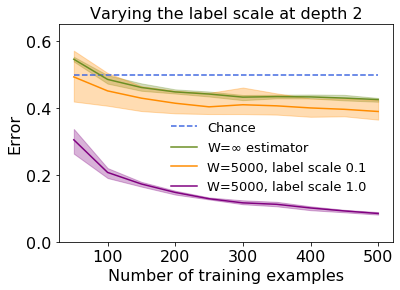

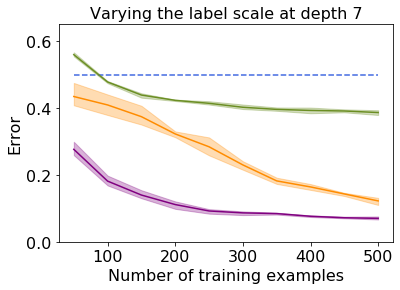

In [9]:
for depth in [2,7]:
    width = 5000
    random_labels = False
    binary_digits = False

    label = "Chance"
    plt.plot(num_train_examples_list, [0.5]*len(num_train_examples_list), label=label, linestyle='--', color=cs[0])

    label = f"W=$\infty$ estimator"
    color = cs[1]
    idx = 2
    mean, maxi, mini = get_curves(results_one, random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color)
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

    label = f"W={width}, label scale 0.1"
    color = cs[3]
    idx = 1
    mean, maxi, mini = get_curves(results_tenth, random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color, linestyle='-')
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

    label = f"W={width}, label scale 1.0"
    color = cs[2]
    idx = 1
    mean, maxi, mini = get_curves(results_one, random_labels, binary_digits, depth, width, idx)
    plt.plot(num_train_examples_list, mean, label=label, color=color, linestyle='-')
    plt.fill_between(x=num_train_examples_list, y1=mini, y2=maxi, color=color, alpha=0.3)

    plt.xlabel("Number of training examples")
    plt.ylabel("Error")
    plt.ylim(0.0,0.65)
    plt.title(f"Varying the label scale at depth {depth}")
    if depth==2:
        plt.legend(bbox_to_anchor=(0.3, 0.61), loc='upper left', fontsize=13)
    plt.savefig(f'figures/varying-label-scale-depth{depth}.pdf', bbox_inches='tight')
    plt.show()